In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sklearn

In [4]:
from sklearn import datasets

In [5]:
diabetes = datasets.load_diabetes()

In [6]:
print('The full data matrix has shape', diabetes.data.shape)

The full data matrix has shape (442, 10)


In [7]:
print('Dimension of the feature vector', diabetes.feature_names)

Dimension of the feature vector ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
print('Dimension of the target value', diabetes.target.shape)

Dimension of the target value (442,)


In [9]:
count=1

In [10]:
fig=plt.figure(figsize=(15, 10), dpi=80)

<Figure size 1200x800 with 0 Axes>

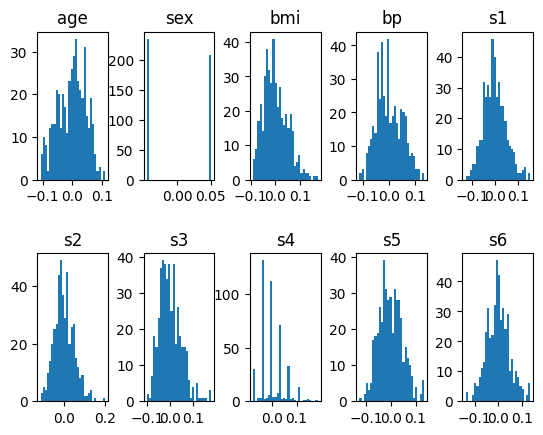

In [11]:
for i in range(diabetes.data.shape[1]):
    plt.subplot(2,5, count)
    plt.hist(diabetes.data[:, i], bins=30)
    plt.title(diabetes.feature_names[i])
    count+=1

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # サブプロット間の間隔を調整
fig.tight_layout(pad=0.4)
plt.show()

In [151]:
X = diabetes.data[:, np.newaxis, 2]
# X = diabetes.data[:, 2:3]

### X = diabetes.data[:, np.newaxis, 2]:
- このコードは、データセットから3番目の特徴量（インデックスは2）を取り出し、それを X に割り当てています。
- np.newaxis は、選択されたデータに新しい次元を追加します。
    - これにより、単一の特徴量を持つデータが2次元配列として形成されます（例えば、(442,)から(442, 1)へ変換されます）。
- これは、scikit-learnの多くのモデルが特徴量の配列として2次元配列を期待するために必要です。
### X = diabetes.data[:, 2:3]:
- このコードも同じ特徴量（BMI）を選択していますが、np.newaxis を使用する代わりにスライスを使っています。
- 2:3 はインデックス2から3未満までの要素を取り出し（実際にはインデックス2のみ）、結果として2次元配列を作成します。
- こちらも結果は X に割り当てられます。


In [152]:
y = diabetes.target

In [153]:
print('Dimension of the feature matrix', X.shape)

Dimension of the feature matrix (442, 1)


In [154]:
print('Dimension of the target value', y.shape)

Dimension of the target value (442,)


In [155]:
def naive_split_data(X, y, split_index):
    X_train = X[:-split_index]
    X_test = X[-split_index:]
    y_train = y[:-split_index]
    y_test = y[-split_index:]
    return X_train, X_test, y_train, y_test

- 引数:
    - X: 特徴データ
    - y: ターゲットデータ（目的変数）
    - split_index: どのインデックスでデータを分割するか
- 処理内容:
    - X と y はそれぞれ指定されたインデックスで訓練データとテストデータに分割されます。
- 戻り値:
    - 訓練データおよびテストデータの組 (X_train, X_test, y_train, y_test)

In [156]:
def split_data(data, target, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices,:], data[test_indices,:], target[train_indices], target[test_indices]

- 引数
    - data: 特徴データ
    - target: ターゲットデータ
    - test_ratio: テストデータの比率 (0から1の間の実数)
- 処理内容:
    - データをランダムにシャッフルします。
    - シャッフルしたデータを指定された比率で訓練データとテストデータに分割します。
- 戻り値:
    - 訓練データおよびテストデータの組

In [157]:
X_train, X_test, y_train, y_test = naive_split_data(X, y, 44)

- 44番目のインデックスでデータを分割しています。

In [158]:
print('Naive Split')
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

Naive Split
X train (398, 1)
X test (44, 1)
y train (398,)
y test (44,)


In [159]:
X_train, X_test, y_train, y_test = split_data(X,y,0.1)

- 全データの10%をテストデータとしてランダムに選び、残りの90%を訓練データとしています。

In [160]:
print('Less Naive Split')
#check the resultant sizes
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

Less Naive Split
X train (398, 1)
X test (44, 1)
y train (398,)
y test (44,)


In [161]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [162]:
regr.fit(X_train, y_train)

LinearRegression()

In [163]:
print('Coefficients: \n', regr.coef_) # 係数
print('Intercept: \n', regr.intercept_) #　切片（数学）

Coefficients: 
 [949.41905883]
Intercept: 
 151.7995795131191


In [164]:
y_pred = regr.predict(X_test)

In [165]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance scpre: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3711.92
Variance scpre: 0.35


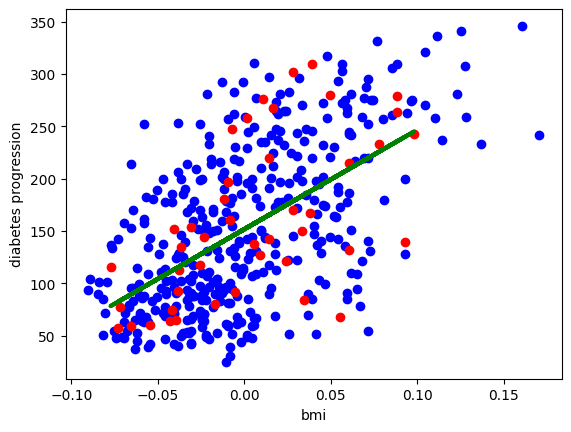

In [166]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

## QUESTIONS

1. For each model:
- What happens inside the fit function?
    - .fit() メソッドは、教師あり学習アルゴリズムで使用され、モデルを訓練データに「適合」させるために使われます。このメソッドを使うことで、モデルは与えられた訓練データ（特徴量とターゲットの値）からパターンを学習し、それを使って予測を行うことができるようになります。
      - モデルを訓練データに「適合」させるとは、モデルが訓練データの構造を理解し、それを一般化するためのパラメータを見つける過程のことです。このプロセスを通じて、モデルは新しいデータに対する予測を行う能力を身につけます。

    - 線形回帰モデルの場合、.fit() メソッドは以下のように動作します：
        - 特徴量の行列（通常 X と表記されます）とターゲットのベクトル（y）を引数として受け取ります。
        - モデルは、特徴量とターゲットの関係を最もよく表す直線（線形回帰の場合）を見つけるために、最小二乗法や他の最適化手法を用いて計算を行います。
        - この計算により、各特徴量に対する重み（係数）とバイアス（切片）が求められます。
        - このプロセスを「学習」または「訓練」と呼びます。モデルが訓練されると、新しいデータに対して予測を行うことができるようになります。
        - .fit() メソッドを使用すると、モデルは内部的に重みを調整し、データに最適なパラメーターを見つけます。
            - これにより、モデルは与えられた訓練データに対して、できるだけ誤差の少ない予測を行うようになります。

- What happens in the predict function?<br>

- How is the chosen performance score computed?<br> 

- What criteria is being optimized?